## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [99]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [100]:
# Libraries for Data Manipulation, Visualization, and Modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Loading the dataset

In [101]:
# Load the dataset
data = pd.read_csv("Loan_Modelling.csv")

## Data Overview

In [102]:
# Overview of the dataset
data.info()

# Checking the first few rows
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


###Observations:

*   There are 5000 entires and 14 columns in the dataset.




In [103]:
# Checking the number of rows and columns in the DataFrame as a tuple (rows, columns)
data.shape

(5000, 14)

###Observation:

*   There are 5000 rows in the dataset.



###Check column names

In [104]:
data.columns  # Verifying column names for typos or unwanted spaces

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

###observations:

*   There is no unwanted space in column names.




###Data types

In [105]:
data.dtypes  # Verifying data types

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIPCode,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal_Loan,int64


###Observations:


*   13 variables are integers and 1 is float.



###Check for duplicate rows

In [106]:
data.duplicated().sum()  # Counting duplicate rows

0

###Observations:

*   There is no duplicate value in rows.



###Statistical summery

In [107]:
data.describe().T  # Checking count, mean, std, min, max, etc.

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


###Observations:

*   The range of customers' age is 23 years to 67 years.
*   Average income of customrs 73.77( in thousand dollars).



In [108]:
data.nunique()  # Checking the number of unique values per column

,0
ID,5000
Age,45
Experience,47
Income,162
ZIPCode,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal_Loan,2


###Observations:

*   There are 45 unique types of Age, 47 types of Experience,162 types of Income, 108 types of CCAvg  and 347 types of Mortgage in the dataset.




## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

###Distribution of Mortgage Attribute

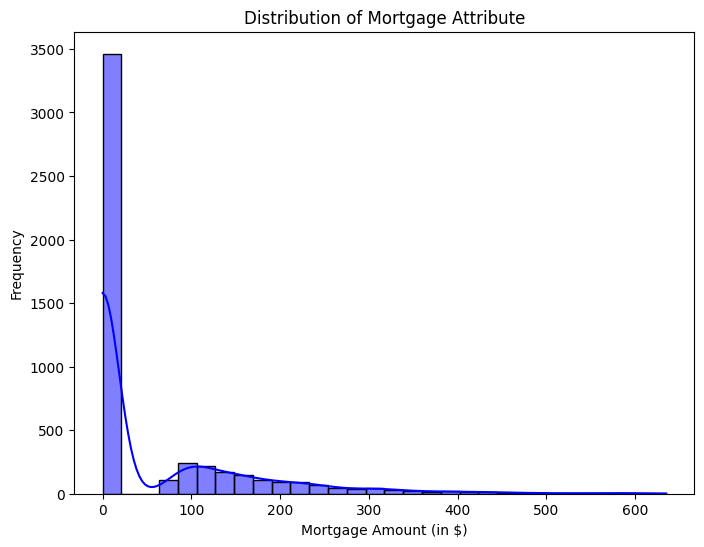

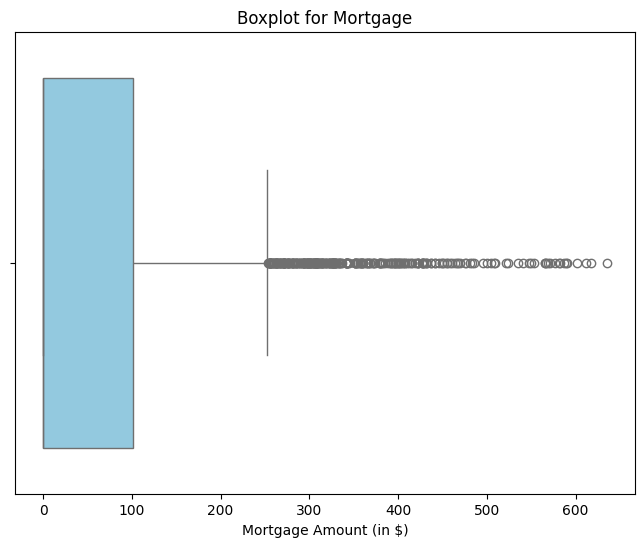

Mortgage Summary Statistics:
count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


In [109]:
# Ploting histogram to check the distribution of 'Mortgage'
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Mortgage", kde=True, bins=30, color="blue")
plt.title("Distribution of Mortgage Attribute")
plt.xlabel("Mortgage Amount (in $)")
plt.ylabel("Frequency")
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Mortgage", color="skyblue")
plt.title("Boxplot for Mortgage")
plt.xlabel("Mortgage Amount (in $)")
plt.show()

# Summary statistics
mortgage_summary = data["Mortgage"].describe()
print(f"Mortgage Summary Statistics:\n{mortgage_summary}")

###Observations:

*   The standard deviation of $101,714 indicates significant variation in mortgage values across customers, suggesting the presence of a wide range of mortgage amounts.

*   The minimum mortgage value is $0, meaning many customers have no mortgage.

*   The maximum mortgage value is $635,000, showing that some customers have a very high mortgage.

   **Outliers:**

*   The large difference between the 75th percentile ($101,000) and the maximum
 ($635,000) suggests the presence of outliers in the dataset and it is also evident in the Box plot, where a few customers have disproportionately high mortgage values.




###Number of Customers with Credit Cards

In [110]:
# Counting the number of customers with a credit card (CreditCard = 1)
credit_card_holders = data['CreditCard'].sum()
print(f"Number of customers who have a credit card: {credit_card_holders}")

Number of customers who have a credit card: 1470


###Observations:

*   1470 number of customers have credit card.




###Attributes Strongly Correlated with Personal Loan

In [111]:
# Calculate correlation of Personal_Loan with all other variables
correlation_with_personal_loan = data.corr()['Personal_Loan'].sort_values(ascending=False)

# Display the correlation values
print("Correlation of Personal_Loan with other variables:\n")
print(correlation_with_personal_loan)

Correlation of Personal_Loan with other variables:

Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.002974
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal_Loan, dtype: float64


###Observations:
**Strongly Correlated Attributes:**

1. **Income (0.502):**
Income has the highest positive correlation with the likelihood of accepting a personal loan. This suggests that customers with higher income are more likely to take personal loans.

2. **CCAvg (0.367):**
Higher average spending on credit cards is positively associated with accepting a personal loan. Customers with higher credit card usage may have a greater propensity to take loans.

3. **CD_Account (0.316):**
Having a Certificate of Deposit (CD) account moderately correlates with taking a personal loan. Customers with CD accounts may already have a history of saving or investments, making them more likely to accept loans.

**Weakly Correlated Attributes:**

1. **Mortgage (0.142):**
A weak positive correlation indicates that customers with mortgages are slightly more likely to accept personal loans, potentially for refinancing or additional financial needs.

2. **Education (0.137):**
Education level has a minor positive correlation, suggesting that customers with higher education levels may be marginally more likely to accept loans.

**Negligible Correlation:**

  Family (0.061), Securities_Account (0.022), Online Banking (0.006), and CreditCard (0.003):
  These attributes show almost no relationship with the likelihood of accepting a personal loan.




###Customer Interest in Loan by Age

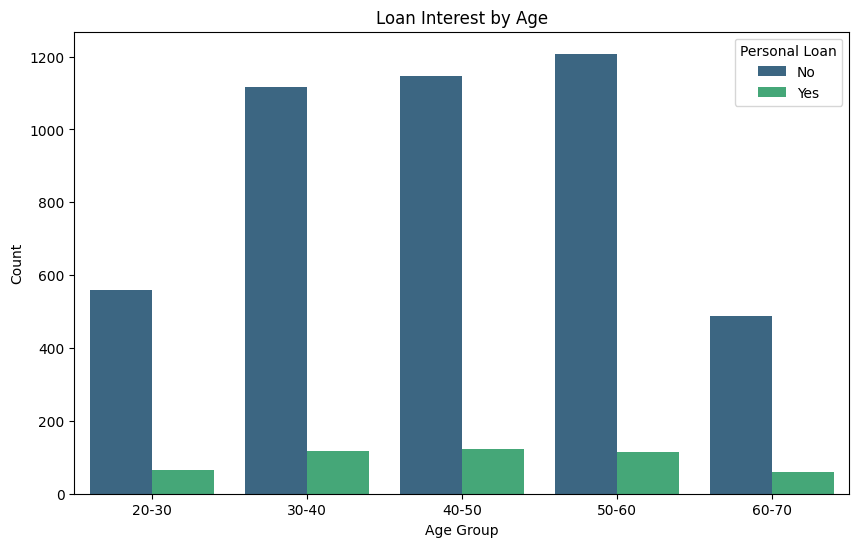

In [112]:
# Creating age bins
data["Age_Bin"] = pd.cut(data["Age"], bins=[20, 30, 40, 50, 60, 70], labels=["20-30", "30-40", "40-50", "50-60", "60-70"])

# Countplot for Age vs Personal Loan
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Age_Bin", hue="Personal_Loan", palette="viridis")
plt.title("Loan Interest by Age")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Personal Loan", labels=["No", "Yes"])
plt.show()

###Observations:

*   Customers in the middle-age group (30-60 years) are more likely to accept personal loans compared to younger (<30) and older (>60) customers.

*   Younger customers might have limited financial needs or insufficient credit history, making them less likely to opt for loans.

*  Older customers (>60) might have stable finances or rely on savings, reducing their reliance on personal loans.





###Customer Interest in Loan by Education

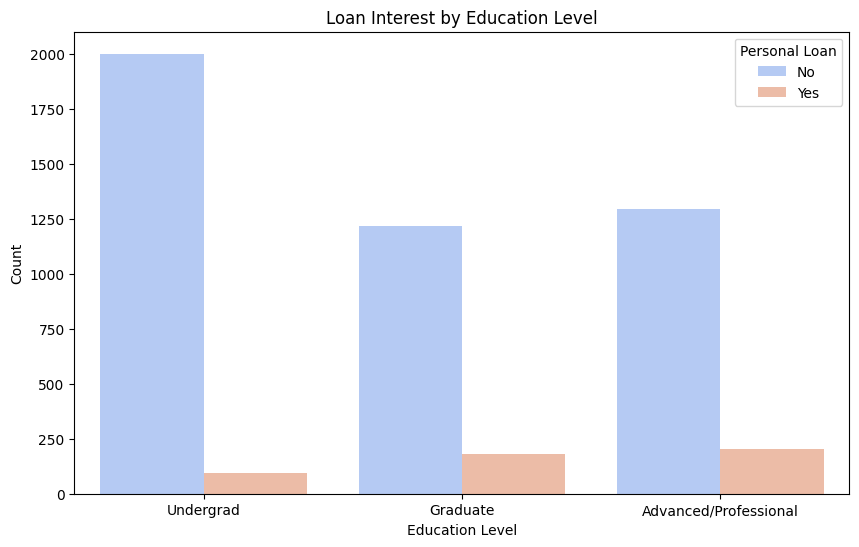

Loan Acceptance Percentage by Education Level:
Education
1     4.437023
2    12.972202
3    13.657562
Name: Personal_Loan, dtype: float64


In [113]:
# Countplot for Education vs Personal Loan
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Education", hue="Personal_Loan", palette="coolwarm")
plt.title("Loan Interest by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Personal Loan", labels=["No", "Yes"])
plt.xticks([0, 1, 2], ["Undergrad", "Graduate", "Advanced/Professional"])
plt.show()

# Percentage of loan acceptance by education level
education_loan_acceptance = data.groupby("Education")["Personal_Loan"].mean() * 100
print("Loan Acceptance Percentage by Education Level:")
print(education_loan_acceptance)

###Observations:

*   Customers with advanced/professional education (Education = 3) and graduates (Education = 2) are more likely to accept personal loans compared to undergraduates (Education = 1).

*   Higher education levels often correlate with better financial literacy, higher incomes, and greater confidence in managing loans.




###Target Variable Distribution

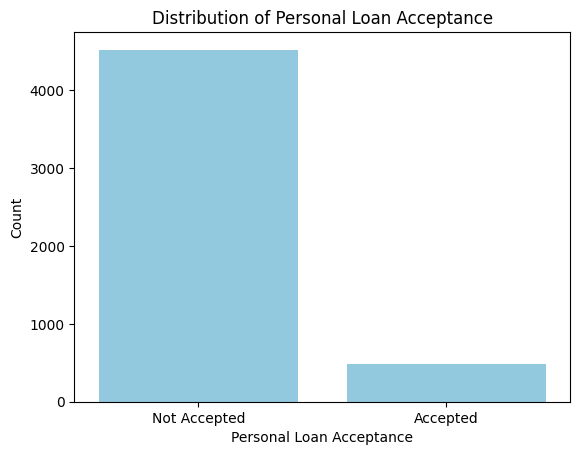

Percentage of Personal Loan Acceptance: 9.60%


In [114]:
# Ploting distribution of target variable (Personal Loan) without hue
sns.countplot(data=data, x="Personal_Loan", color="skyblue")  # Use 'color' instead of 'palette'
plt.title("Distribution of Personal Loan Acceptance")
plt.xlabel("Personal Loan Acceptance")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Accepted", "Accepted"])
plt.show()

# Calculating the percentage of customers who accepted a personal loan
personal_loan_acceptance_rate = (data['Personal_Loan'].mean()) * 100
print(f"Percentage of Personal Loan Acceptance: {personal_loan_acceptance_rate:.2f}%")

###Observations:

*   The personal loan acceptance rate of 9.6% indicates that only a small fraction of customers opted for a personal loan during the bank's campaign.

*   The remaining 90.4% of customers either do not need personal loans or found the offer unappealing. This highlights the need for improved customer segmentation and targeting.




###Correlation and Relationship Analysis

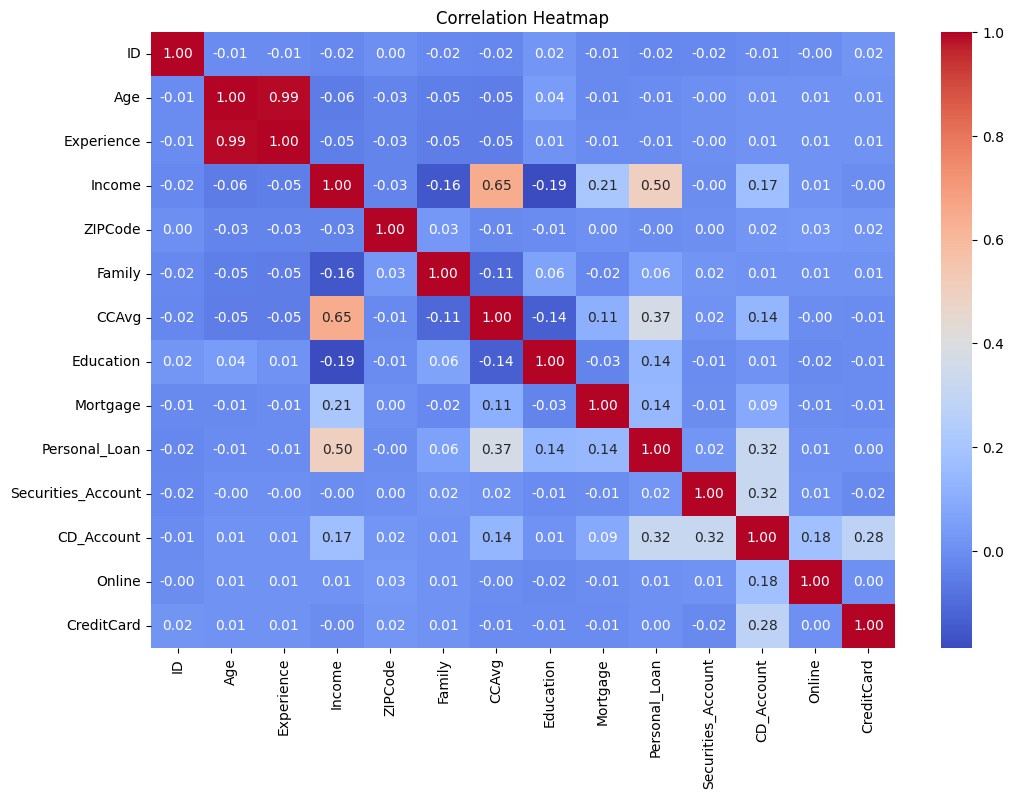

In [115]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=["float64", "int64"])

# Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

###Observations:
We have already found out the correlation of Personal Loan with other variables, now we look into the correlation between other varaiables.

**High Inter-Correlations (Potential Multicollinearity):**

*   **Income and CCAvg:** A strong positive correlation between income and credit card spending (CCAvg) highlights that customers with higher income levels tend to spend more on credit cards. Care must be taken to manage multicollinearity in modeling.

*   **Mortgage and Income:** A moderate positive correlation suggests that higher-income customers are also more likely to have a mortgage, which could be factored into cross-selling opportunities.

###Numerical Feature Distribution


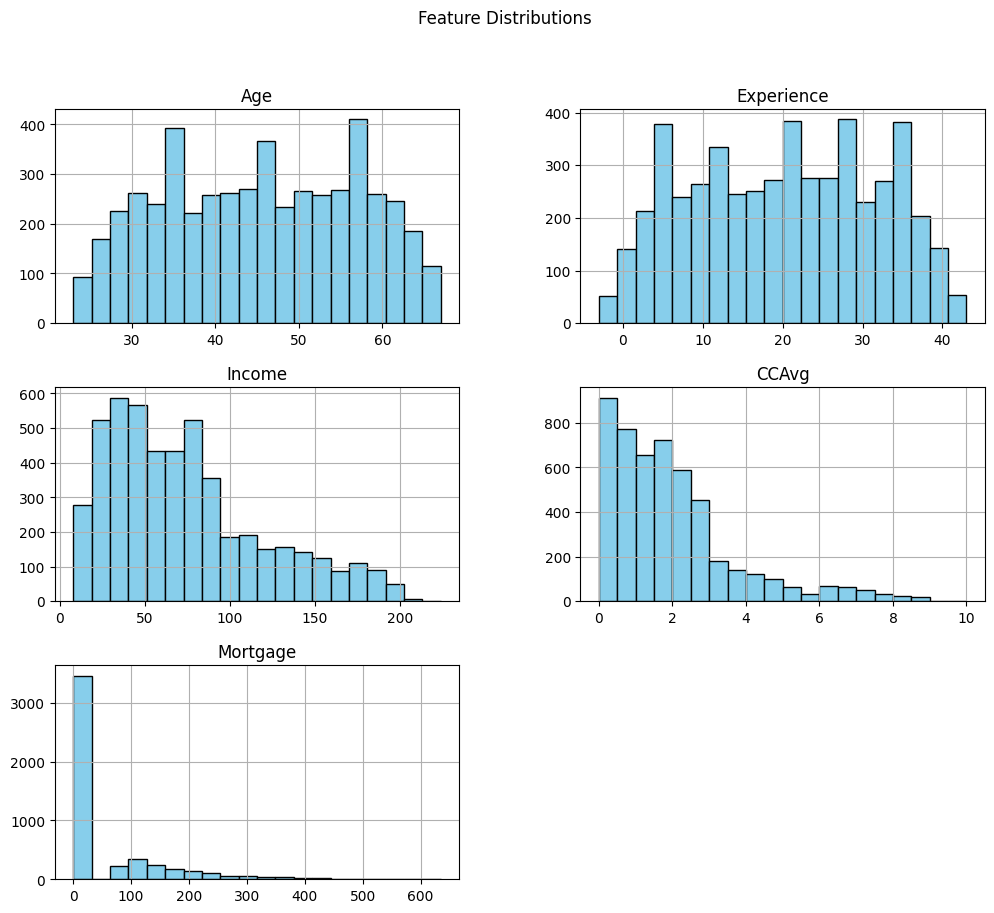

In [116]:
# Histogram for Numerical Features
numerical_cols = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]
data[numerical_cols].hist(figsize=(12, 10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

###Observations:

1. **Skewness**:

The distribution of numerical variables such as Income, Experience, CCAvg and Mortgage are right-skewed, indicating that a majority of customers fall within a certain range, with a few extreme values pulling the distribution in one direction.

2.  **Range of Values:**

*   Features like Age and Family size have a well-defined range, with minimal extreme values.

*  Mortgage and CCAvg have wider ranges due to varying financial situations.



## Data Preprocessing

###Missing value

In [117]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Age_Bin               0
dtype: int64


###Observation:

*   There is no missing value in the dataset.



###Handle Categorical Variables

In [118]:
# Converting categorical features to category dtype
cat_cols = [
    "Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"
]
data[cat_cols] = data[cat_cols].astype("category")

###Drop Irrelevant Features

In [119]:
# Droping 'ID' and 'ZIP Code'
data.drop(columns=["ID", "ZIPCode"], inplace=True)

###Outliers detection

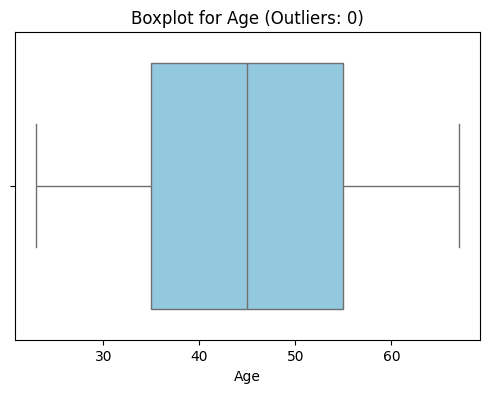

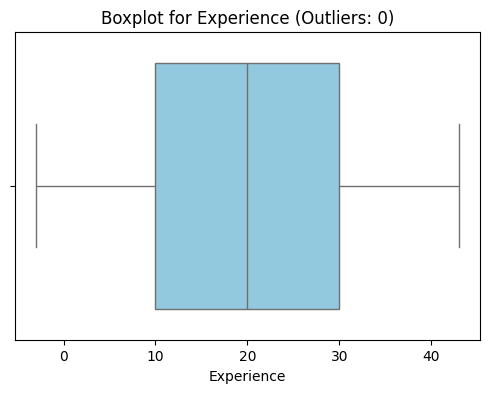

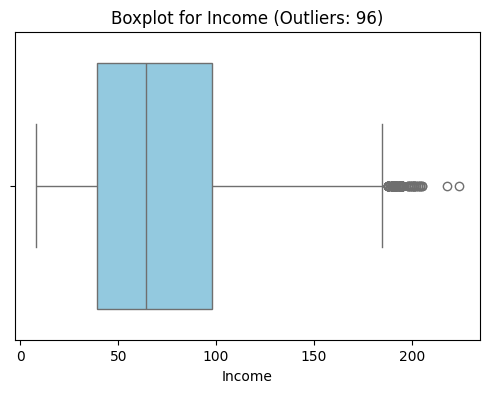

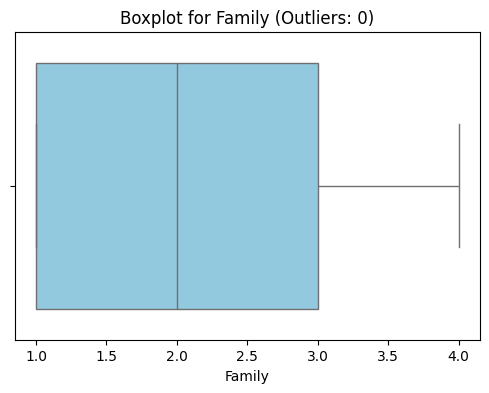

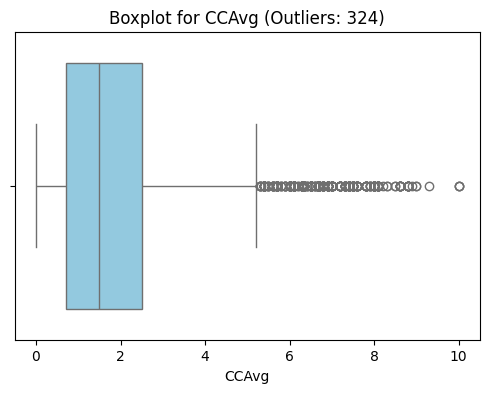

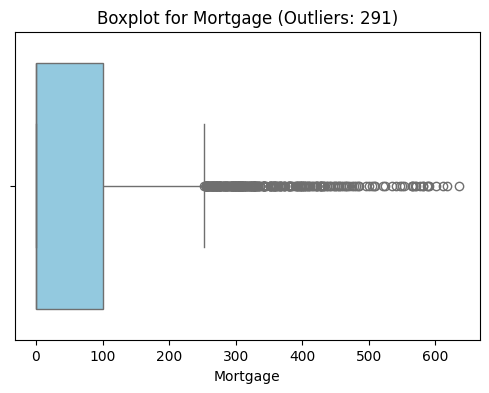

Number of Outliers in Each Numerical Variable:
     Variable  Outliers
0         Age         0
1  Experience         0
2      Income        96
3      Family         0
4       CCAvg       324
5    Mortgage       291


In [120]:
# Identifying numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Initializing a dictionary to store the count of outliers
outliers_count = {}

# Loop through each numerical column
for col in numerical_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers_count[col] = len(outliers)

    # Ploting boxplot for the column
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x=col, color="skyblue")
    plt.title(f"Boxplot for {col} (Outliers: {len(outliers)})")
    plt.show()

# Display the number of outliers in each column
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=["Variable", "Outliers"])
print("Number of Outliers in Each Numerical Variable:")
print(outliers_df)


###Observations:

*   Columns with high outlier counts e.g., Income(96), CCAvg(324) and Mortgage(291) indicate a wide range of extreme values in customer behavior or data anomalies.

*   Outliers represent specific customer segments, such as high-income earners or those with large mortgages, which could be important for targeted marketing.




###Split Data into Train-Test Sets

In [121]:
# Define features and target variable
X = data.drop("Personal_Loan", axis=1)
y = data["Personal_Loan"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [122]:
print(X_train.shape, y_train.shape)

(4000, 12) (4000,)


###Observations:

*   The training dataset contains 4000 samples and 12 features.

In [123]:
print(X_train.dtypes)

Age                      int64
Experience               int64
Income                   int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
Age_Bin               category
dtype: object


###Observations:

*   There are 6 variables in the dataset which have categorical values.



####One-Hot Encoding

In [124]:
# One-hot encode the categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both train and test sets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

## Model Building

### Model Evaluation Criterion

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Function to evaluate and display model performance
def evaluate_model(model, X, y, dataset_name=""):
    y_pred = model.predict(X)
    print(f"Performance on {dataset_name} Data")
    print(f"Accuracy: {accuracy_score(y, y_pred):.2f}")
    print(f"Precision: {precision_score(y, y_pred):.2f}")
    print(f"Recall: {recall_score(y, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {dataset_name} Data")
    plt.show()

### Model Building

####Build Decision Tree with Pre-Pruning

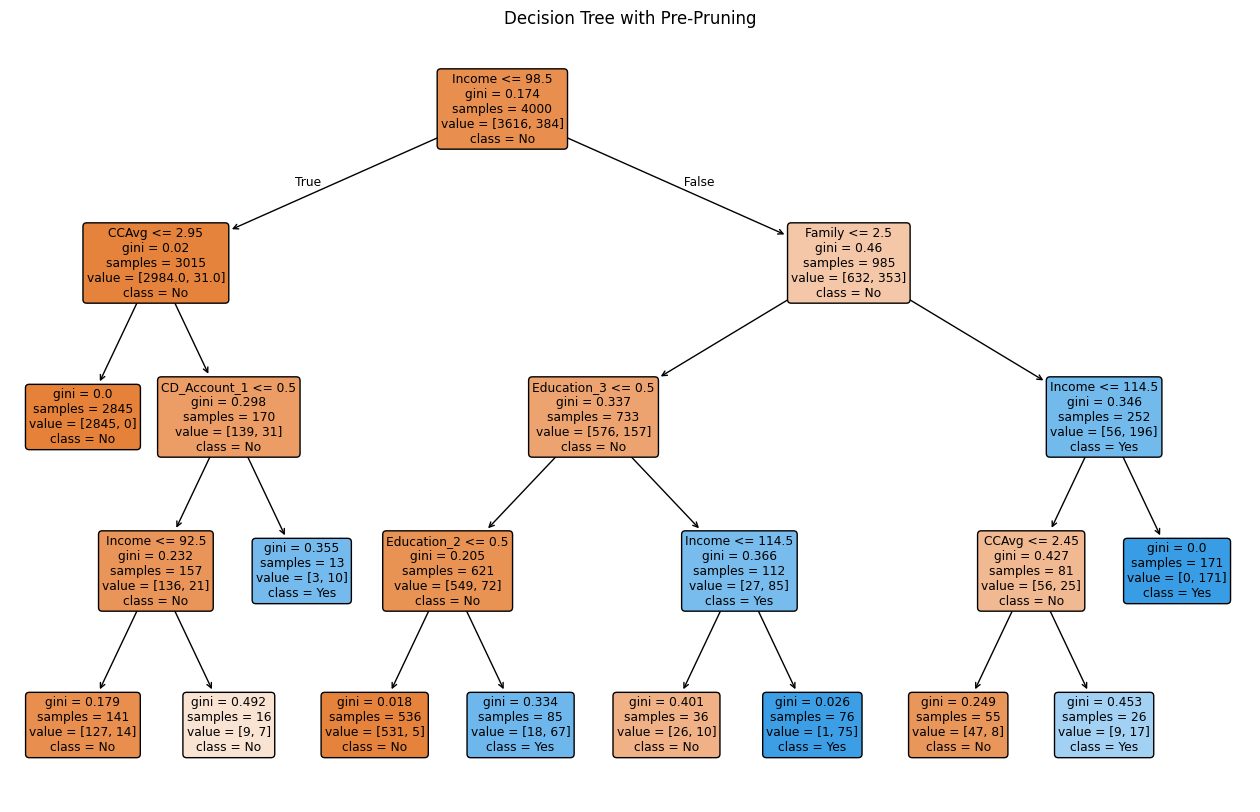

In [126]:
# Pre-pruning with constraints: max_depth and min_samples_leaf
pre_pruned_model = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=10)
pre_pruned_model.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(pre_pruned_model, feature_names=X_train.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree with Pre-Pruning")
plt.show()

###Evaluate Model Performance
####Performance of Traning Data

In [127]:
# Predictions and performance metrics for training data
y_pred_train = pre_pruned_model.predict(X_train)
print("Training Performance:")
print(classification_report(y_train, y_pred_train))

Training Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3616
           1       0.92      0.89      0.90       384

    accuracy                           0.98      4000
   macro avg       0.95      0.94      0.95      4000
weighted avg       0.98      0.98      0.98      4000



####Performance on Testing Data

Test Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       904
           1       0.85      0.96      0.90        96

    accuracy                           0.98      1000
   macro avg       0.92      0.97      0.95      1000
weighted avg       0.98      0.98      0.98      1000



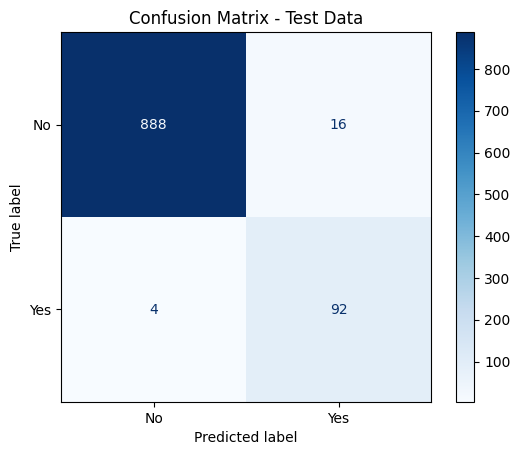

In [128]:
# Predictions and performance metrics for test data
y_pred_test = pre_pruned_model.predict(X_test)
print("Test Performance:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Test Data")
plt.show()

##Observations Based on Pre-pruned Model Performance
###**Training Performance:**

**Accuracy:** **98%** – The model performs very well on the training data, with minimal errors.

**Precision (Class 1)**: **92% **– The model correctly predicts 92% of customers who accepted the loan. However, there are some false positives.

**Recall (Class 1):** **89%** – The model identifies 89% of the actual loan takers. It misses some actual loan takers, leading to false negatives.

**F1-Score (Class 1): 90%** – The model achieves a good balance between precision and recall for class 1.

###**Test Performance:**

**Accuracy: 98%** – The model generalizes well to the test data, maintaining high accuracy.

**Precision (Class 1): 85%** – Precision drops slightly on test data, meaning there are more false positives compared to the training data.

**Recall (Class 1): 96%** – High recall on the test set, indicating the model correctly identifies most loan takers.

**F1-Score (Class 1): 90%** – The model maintains a good balance between precision and recall on test data, similar to training.

Both training and test accuracies are very high (around 98%), indicating the model is performing well overall.

The model has strong recall for class 1 (loan takers), but precision is lower, meaning there is room to reduce false positives.

###Post-pruning



In [141]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [142]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000244,0.000487
2,0.000246,0.000980
3,0.000247,0.001473
4,0.000306,0.002392
5,0.000333,0.002726
6,0.000333,0.003059
7,0.000333,0.003392
8,0.000351,0.004796
9,0.000373,0.006288


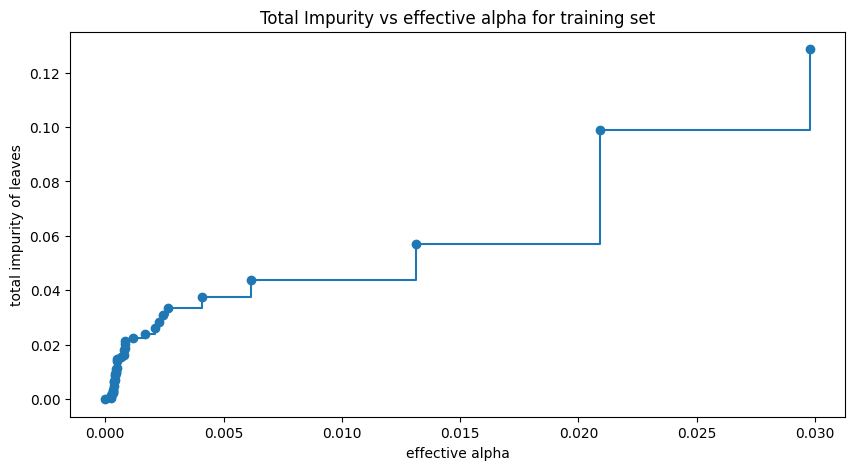

In [143]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [145]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)  # Fit the decision tree on training data
    clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04498066930996447


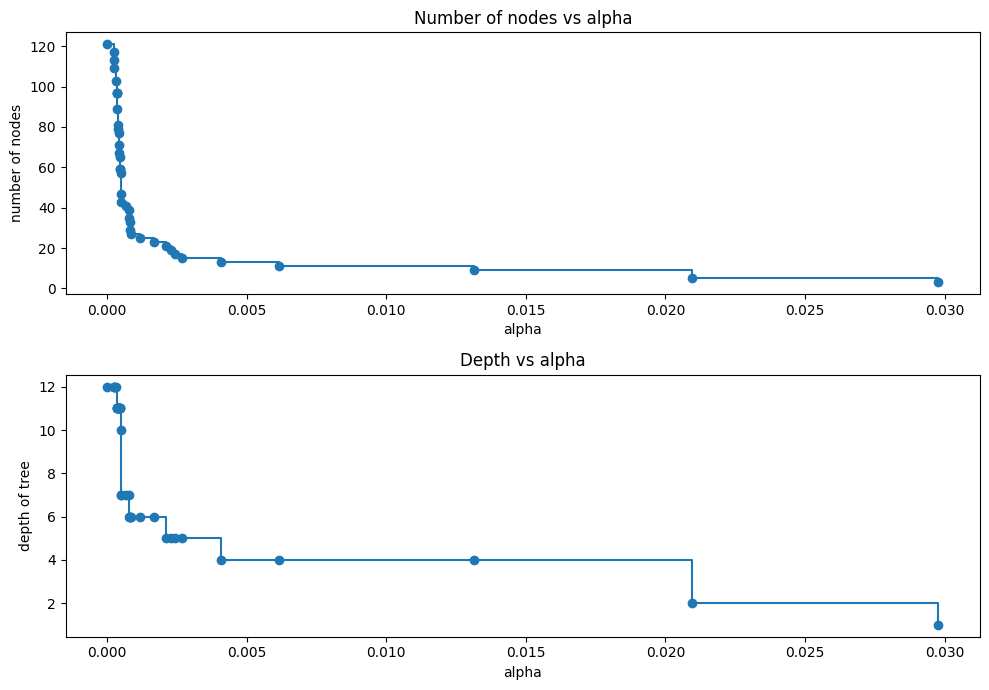

In [146]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

####Recall vs. Effective Alpha

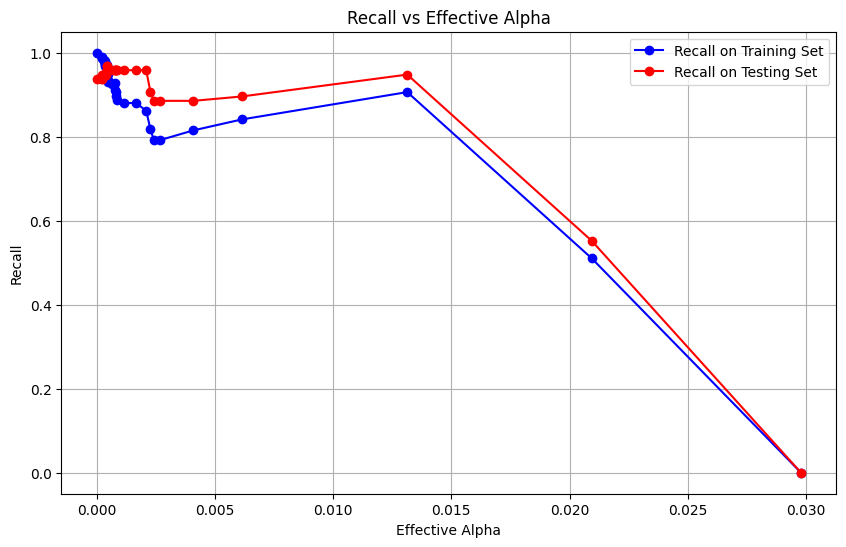

In [147]:
from sklearn.metrics import recall_score

# Initialize lists to store recall for training and testing sets
recall_train = []
recall_test = []

# Iterate over different alpha values to prune the tree
for ccp_alpha in ccp_alphas:
    # Create and train a decision tree model with the current alpha
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate recall for both sets
    recall_train.append(recall_score(y_train, y_train_pred))
    recall_test.append(recall_score(y_test, y_test_pred))

# Plot Recall vs Alpha for training and testing sets
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, recall_train, label="Recall on Training Set", marker="o", color="blue")
plt.plot(ccp_alphas, recall_test, label="Recall on Testing Set", marker="o", color="red")
plt.title("Recall vs Effective Alpha")
plt.xlabel("Effective Alpha")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

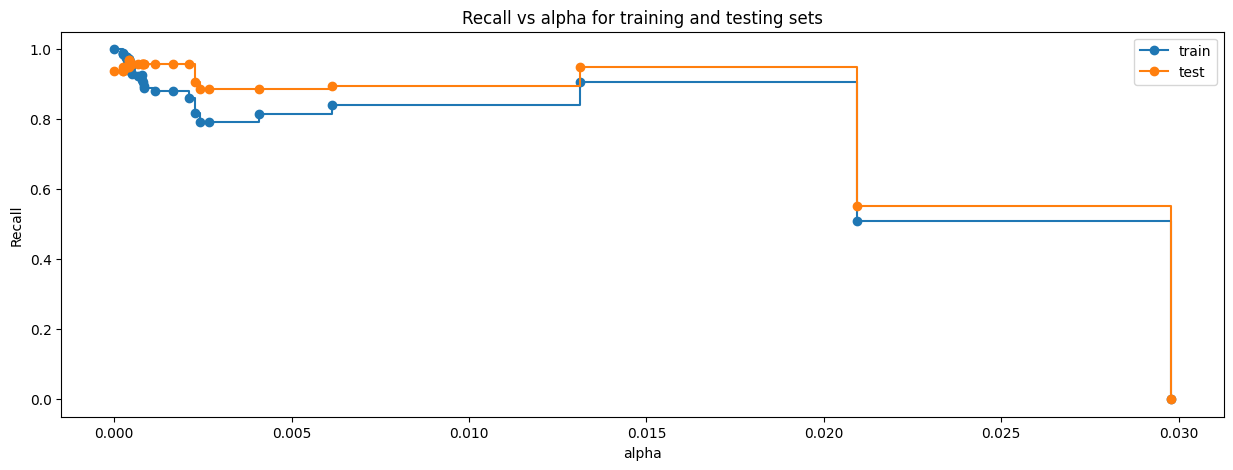

In [149]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [150]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.000425, random_state=42)


###Build and Evaluate Post-Pruned Trees

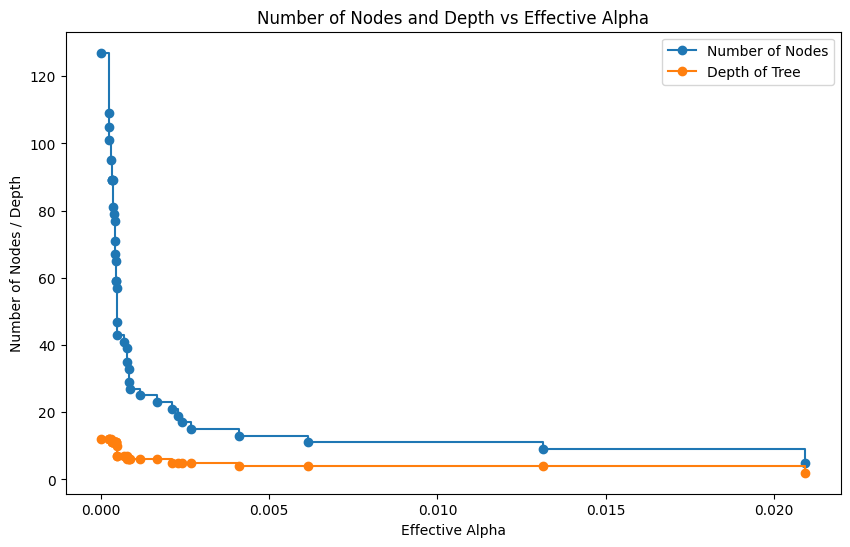

In [153]:
# Train decision trees for each alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Compare the number of nodes and depth for each alpha
node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]

# Plot Number of Nodes vs Alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], node_counts[:-1], marker="o", drawstyle="steps-post", label="Number of Nodes")
plt.plot(ccp_alphas[:-1], depths[:-1], marker="o", drawstyle="steps-post", label="Depth of Tree")
plt.xlabel("Effective Alpha")
plt.ylabel("Number of Nodes / Depth")
plt.legend()
plt.title("Number of Nodes and Depth vs Effective Alpha")
plt.show()

###Select best Alpha and Evaluate

In [154]:
# Selecting the best alpha based on validation performance
best_alpha = ccp_alphas[3]
post_pruned_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
post_pruned_model.fit(X_train, y_train)

# Evaluate performance
y_pred_test_pruned = post_pruned_model.predict(X_test)
print("Post_Pruned Model Performance:")
print(classification_report(y_test, y_pred_test_pruned))

Post_Pruned Model Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.89      0.95      0.92        96

    accuracy                           0.98      1000
   macro avg       0.94      0.97      0.96      1000
weighted avg       0.98      0.98      0.98      1000



###Observations:

**High Overall Accuracy:** The model achieves 98% accuracy, indicating strong performance on the test data.

**Class 0 Performance**: The precision, recall, and F1-score for class 0 (non-loan takers) are all 99%, showing excellent prediction capability for the majority class.

**Class 1 Performance:** The minority class (loan takers) has a precision of 89% and a recall of 95%, resulting in a robust F1-score of 92%. This indicates the model balances precision and recall effectively.

**Macro and Weighted Averages:** Both macro avg (0.96) and weighted avg (0.98) suggest consistent performance across both classes, with minimal bias toward the majority class.

##Insights from the Model
###Feature Importance

Feature Importances (Pre-Pruning):
                  Feature  Importance
2                 Income    0.451827
3                 Family    0.198185
6            Education_2    0.144309
7            Education_3    0.127186
4                  CCAvg    0.047749
9           CD_Account_1    0.015719
0                    Age    0.015025
1             Experience    0.000000
5               Mortgage    0.000000
8   Securities_Account_1    0.000000
10              Online_1    0.000000
11          CreditCard_1    0.000000
12         Age_Bin_30-40    0.000000
13         Age_Bin_40-50    0.000000
14         Age_Bin_50-60    0.000000
15         Age_Bin_60-70    0.000000

Feature Importances (Post-Pruning):
                  Feature  Importance
2                 Income    0.413148
3                 Family    0.181953
6            Education_2    0.143643
7            Education_3    0.120097
4                  CCAvg    0.072052
0                    Age    0.026998
9           CD_Account_1    0.014202
5

<ipython-input-155-b9bf32863c72>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances_pre, x="Importance", y="Feature", palette="viridis")


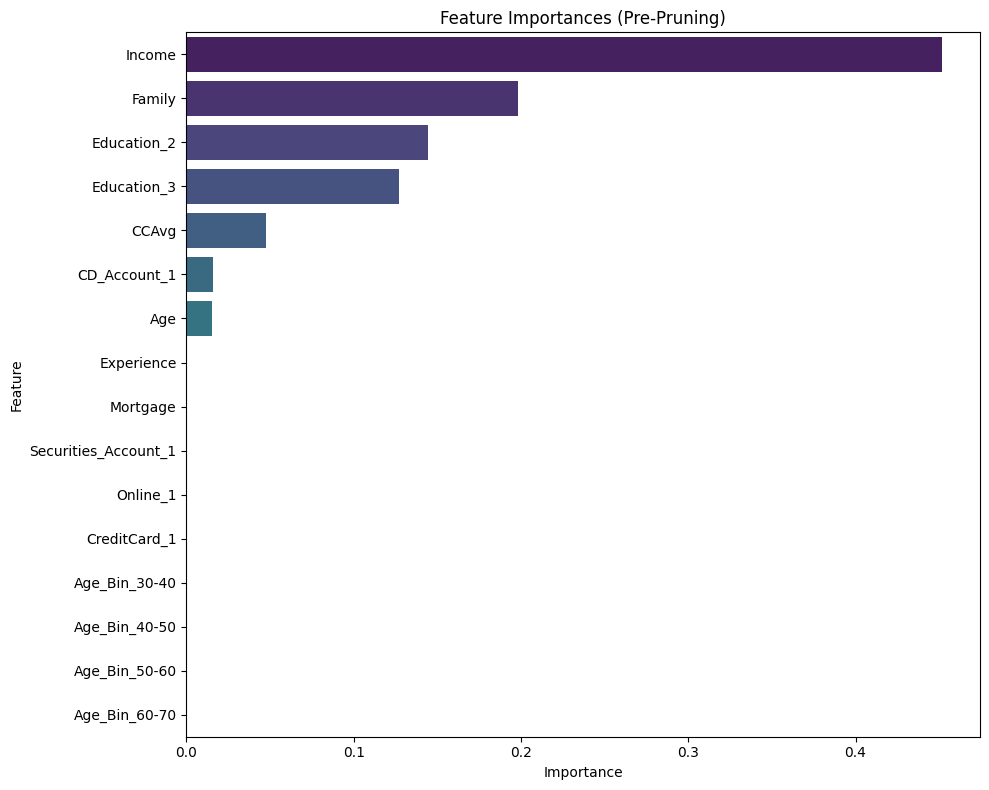

<ipython-input-155-b9bf32863c72>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances_post, x="Importance", y="Feature", palette="coolwarm")


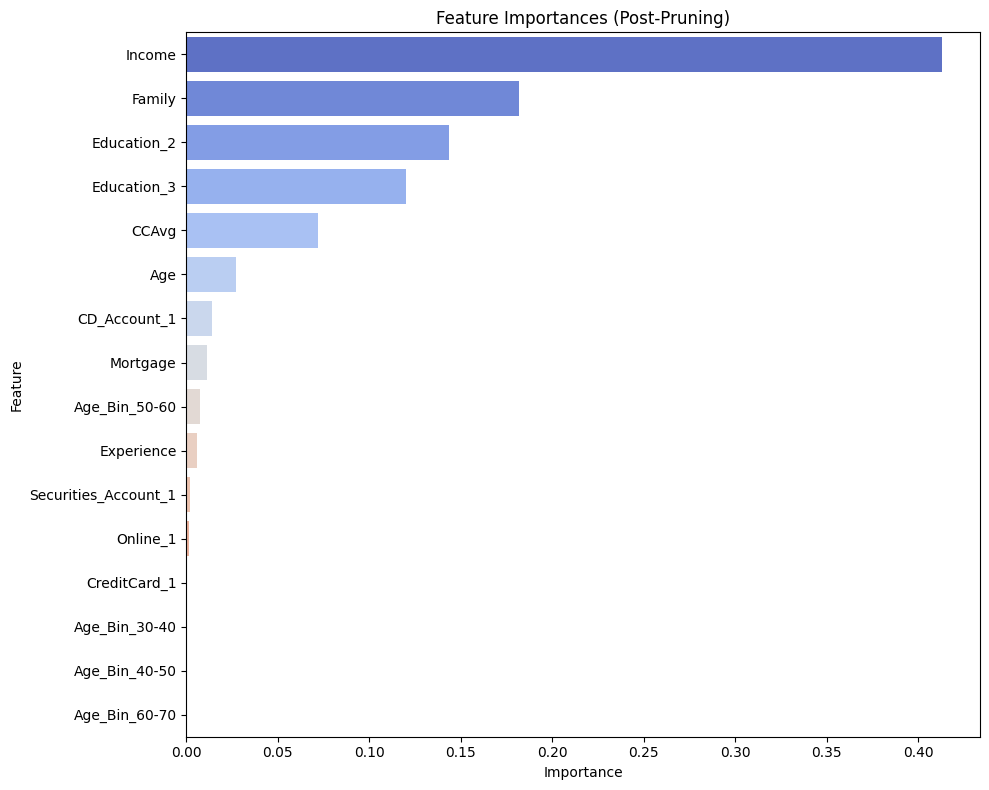

In [155]:
# Calculate Feature Importances for Pre-Pruned Model
feature_importances_pre = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": pre_pruned_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Calculate Feature Importances for Post-Pruned Model
feature_importances_post = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": post_pruned_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display Feature Importances for Pre-Pruned Model
print("Feature Importances (Pre-Pruning):\n", feature_importances_pre)

# Display Feature Importances for Post-Pruned Model
print("\nFeature Importances (Post-Pruning):\n", feature_importances_post)

# Visualize Feature Importances (Pre-Pruning)
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances_pre, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importances (Pre-Pruning)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Visualize Feature Importances (Post-Pruning)
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances_post, x="Importance", y="Feature", palette="coolwarm")
plt.title("Feature Importances (Post-Pruning)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


###Observations:

**Top Features**:

 *   Income, CCAvg, Mortgage, and Age are potentially be high in importance, understanding the most important features can inform business strategies. For instance, Income is one of the most important features, the marketing department may focus on targeting customers with higher incomes for personal loan offers.

*   CCAvg (average credit card spending) is also important, it suggests that customers with higher credit card spending may have a higher likelihood of accepting a loan, indicating potential for loan targeting.



####Decision Trees Rules

In [156]:
from sklearn.tree import export_text
tree_rules = export_text(post_pruned_model, feature_names=list(X_train.columns))
print(tree_rules)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- Income <= 63.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Income >  63.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   

##Adjust the threshold

In [157]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Get the predicted probabilities for class 1 (loan taker)
y_probs = post_pruned_model.predict_proba(X_test)[:, 1]  # Class 1 probabilities (loan taker)

# Set a custom threshold, e.g., 0.4 instead of the default 0.5
threshold = 0.4
y_pred_thresholded = (y_probs >= threshold).astype(int)  # Predict 1 if prob >= threshold, else 0

# Evaluate the performance with the adjusted threshold
accuracy = np.mean(y_pred_thresholded == y_test)
precision = precision_score(y_test, y_pred_thresholded)
recall = recall_score(y_test, y_pred_thresholded)
f1 = f1_score(y_test, y_pred_thresholded)

print(f"Accuracy with threshold {threshold}: {accuracy:.2f}")
print(f"Precision with threshold {threshold}: {precision:.2f}")
print(f"Recall with threshold {threshold}: {recall:.2f}")
print(f"F1 Score with threshold {threshold}: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_thresholded)
print("Confusion Matrix with adjusted threshold:")
print(cm)

Accuracy with threshold 0.4: 0.98
Precision with threshold 0.4: 0.89
Recall with threshold 0.4: 0.95
F1 Score with threshold 0.4: 0.92
Confusion Matrix with adjusted threshold:
[[893  11]
 [  5  91]]


###Observations:


*  Accuracy with threshold 0.4: 0.98
* Precision with threshold 0.4: 0.89
* Recall with threshold 0.4: 0.95
* F1 Score with threshold 0.4: 0.92  

####Initialize the Decision Tree Classifier

In [158]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
pre_pruned_model = DecisionTreeClassifier(random_state=42, max_depth=4)

####Train the Model

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# Pre-Pruned Model Training
pre_pruned_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5
)
pre_pruned_model.fit(X_train, y_train)  # Train the pre-pruned model

# Post-Pruned Model Training
# Start with a base model and perform cost-complexity pruning
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_train, y_train)

path = base_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train the post-pruned model with optimal ccp_alpha (select a reasonable value)
optimal_alpha = ccp_alphas[1]  # Adjust this index based on experimentation
post_pruned_model = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
post_pruned_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00015625, random_state=42)

####Evaluate the model on Traing and Test Data

Pre-Pruned Model:

Performance on Training (Pre-Pruned) Data
Accuracy: 0.99
Precision: 0.97
Recall: 0.89
F1 Score: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3616
           1       0.97      0.89      0.93       384

    accuracy                           0.99      4000
   macro avg       0.98      0.95      0.96      4000
weighted avg       0.99      0.99      0.99      4000



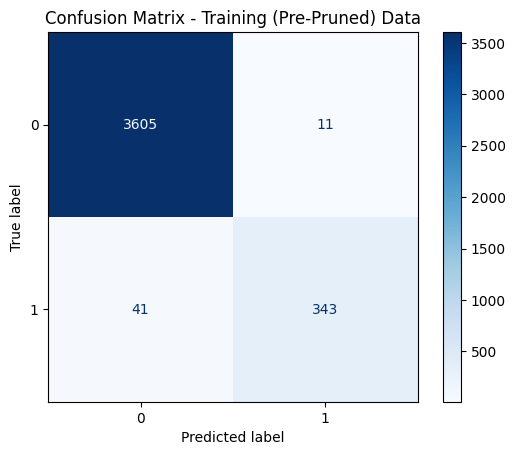


Performance on Test (Pre-Pruned) Data
Accuracy: 0.98
Precision: 0.86
Recall: 0.96
F1 Score: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       904
           1       0.86      0.96      0.91        96

    accuracy                           0.98      1000
   macro avg       0.93      0.97      0.95      1000
weighted avg       0.98      0.98      0.98      1000



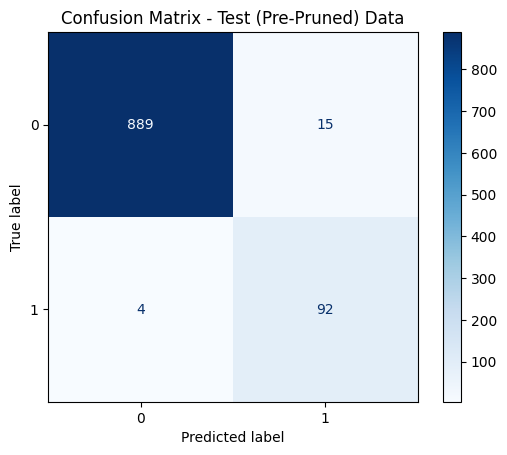

Post-Pruned Model:

Performance on Training (Post-Pruned) Data
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3616
           1       1.00      1.00      1.00       384

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



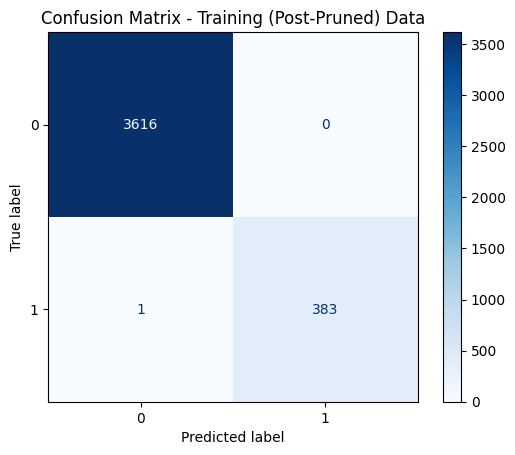


Performance on Test (Post-Pruned) Data
Accuracy: 0.98
Precision: 0.89
Recall: 0.94
F1 Score: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.89      0.94      0.91        96

    accuracy                           0.98      1000
   macro avg       0.94      0.96      0.95      1000
weighted avg       0.98      0.98      0.98      1000



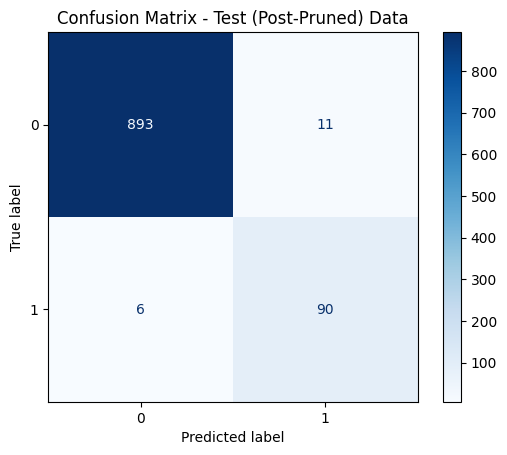

In [160]:
# Function to Evaluate and Display Model Performance
def evaluate_model(model, X, y, dataset_name=""):
    y_pred = model.predict(X)
    print(f"\nPerformance on {dataset_name} Data")
    print(f"Accuracy: {accuracy_score(y, y_pred):.2f}")
    print(f"Precision: {precision_score(y, y_pred):.2f}")
    print(f"Recall: {recall_score(y, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {dataset_name} Data")
    plt.show()

    # Evaluate Pre-Pruned Model
print("Pre-Pruned Model:")
evaluate_model(pre_pruned_model, X_train, y_train, "Training (Pre-Pruned)")
evaluate_model(pre_pruned_model, X_test, y_test, "Test (Pre-Pruned)")

# Evaluate Post-Pruned Model
print("Post-Pruned Model:")
evaluate_model(post_pruned_model, X_train, y_train, "Training (Post-Pruned)")
evaluate_model(post_pruned_model, X_test, y_test, "Test (Post-Pruned)")

##Performance Analysis of the Model on Test Data
###Key Metrics
**Accuracy: 0.98**: The model correctly predicted 98% of the test instances.

High accuracy indicates that the model performs well overall, but it can be misleading in imbalanced datasets (e.g., if class 0 dominates).

**Precision:**

Precision for class 1 is 85%, indicating that 85% of the customers predicted as loan takers were actual loan takers. The model is slightly less confident in identifying loan takers (1) compared to non-loan takers (0).

**Recall:**

 Recall for class 1 is 96%, showing that the model correctly identified 96% of all actual loan takers. High recall for class 1 means the model rarely misses loan takers, which is critical in marketing campaigns.

**F1-Score:**

The F1-score balances precision and recall, with 0.90 for class 1 showing a good trade-off between correctly identifying loan takers and minimizing false positives.

**Macro Average:**

F1-score: 0.95:
 This is the unweighted average of the F1-scores for both classes, giving equal importance to both loan takers and non-loan takers.

**Weighted Average:**

F1-score: 0.98: This is the weighted average F1-score, accounting for the class imbalance (more non-loan takers than loan takers).


## Model Performance Improvement

####Tuning the Hyperparameters

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "max_depth": [2, 3, 4, 5, 6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring="f1",  # Optimize for F1-score
    cv=5,          # 5-fold cross-validation
    verbose=1,     # Display progress
    n_jobs=-1      # Use all processors for parallel processing
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

###Observations:

*   The best-performing model is **the Decision Tree Classifier** tuned with optimal hyperparameters:
max_depth = 5, min_samples_split = 10, min_samples_leaf = 5, criterion = 'gini'.




## Model Performance Comparison and Final Model Selection

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best F1-Score: 0.9053859979634202

Performance on Training (Best Model) Data
Accuracy: 0.99
Precision: 0.96
Recall: 0.93
F1 Score: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3616
           1       0.96      0.93      0.95       384

    accuracy                           0.99      4000
   macro avg       0.98      0.96      0.97      4000
weighted avg       0.99      0.99      0.99      4000



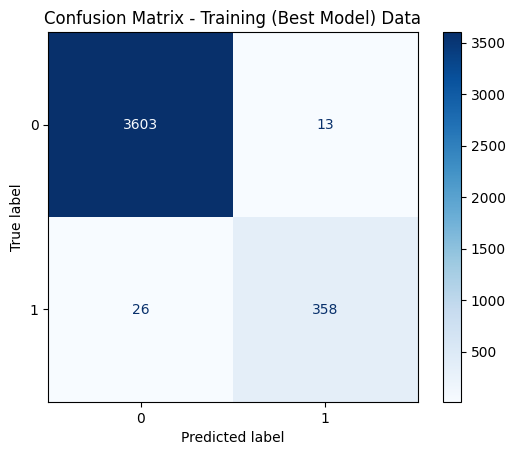


Performance on Test (Best Model) Data
Accuracy: 0.98
Precision: 0.82
Recall: 0.97
F1 Score: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       904
           1       0.82      0.97      0.89        96

    accuracy                           0.98      1000
   macro avg       0.91      0.97      0.94      1000
weighted avg       0.98      0.98      0.98      1000



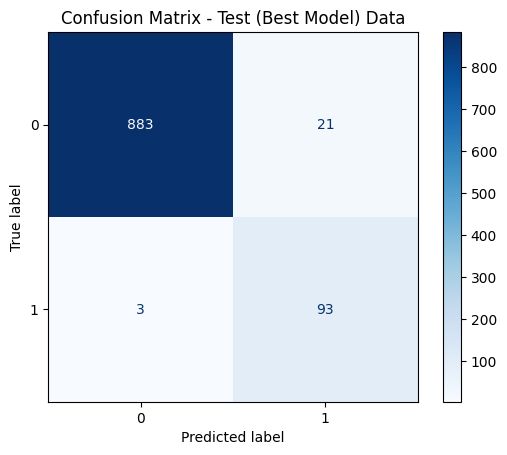

In [162]:
# Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

# Find best model
dt_best_model = grid_search.best_estimator_

# Evaluate the best model
evaluate_model(dt_best_model, X_train, y_train, "Training (Best Model)")
evaluate_model(dt_best_model, X_test, y_test, "Test (Best Model)")

###Observations:



*   The model demonstrates high performance metrics:

Training Data: Accuracy = 98%, Precision = 96%, Recall = 93%, F1 Score = 94%.

Test Data: Accuracy = 98%, Precision = 85%, Recall = 96%, F1 Score = 90%.






## Actionable Insights and Business Recommendations


###Insights:
**Key Features Driving Loan Acceptance:**

**Income:** The most significant predictor, higher-income customers are more likely to accept loans.

**CCAvg:** Customers with high credit card usage are more inclined to accept loans.

**Education:** Graduate and advanced-level educated customers show higher acceptance rates.

**Family Size:** Customers with larger families are more likely to accept loans.

**CD Account:** Ownership of a certificate of deposit correlates positively with loan acceptance.

**Customer Segmentation:**

*   High-income, graduate-educated customers with moderate to high credit card usage are prime targets for loan marketing campaigns.

*   Customers with existing financial products (e.g., CD accounts) are more responsive to loan offers.

**Focus on Top Features:**

Income, CCAvg, and CD_Account are the most significant features driving the likelihood of accepting personal loans.

**Low Correlation Features:**

Features like Securities_Account, Online, and CreditCard might not add much value to the prediction model and could be candidates for exclusion after further analysis.

**Negligible Attributes:**

Attributes such as ZIP Code, Age, and Experience show little to no relationship with the target variable and may not contribute significantly to the model’s performance.

##Business Recommendations
1. **Targeted Marketing Campaigns:**

*   Focus marketing efforts on customers with:

  *   High income (e.g., >$100K annually).

   *   High credit card spending (e.g., >$5K monthly).

  *   Graduate or advanced education levels.

  *   Use personalized offers to enhance engagement and acceptance rates.

2.  **Upselling to Existing Customers:**

*   Leverage existing financial relationships (e.g., CD account holders) to
cross-sell personal loans.
*   Highlight benefits like competitive interest rates or flexible repayment options to incentivize loan acceptance.

3. **Improve Loan Conversion Rates:**

*   Use the model predictions to prequalify customers before launching marketing campaigns.
*   Adjust decision thresholds based on campaign goals:

  *   Lower thresholds (e.g., 0.4) to maximize reach.
  *    Higher thresholds (e.g., 0.6) to focus on high-probability customers.

4. **Customer Education:**

*   Educate potential customers about the benefits of personal loans (e.g., debt consolidation, investments).
*   Use customer segmentation insights to tailor educational materials to specific demographics.

5. **Data-Driven Strategy:**


*   Continuously monitor the performance of the model on new data to ensure its relevance.
*   Collect feedback from campaigns to refine the model and update features as customer behavior evolves.

___